#Tutorial 4

#CSC420 - Fall 2021

#Babak Taati

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# install OpenCV
!pip install opencv-python
import cv2

In [3]:
def imshowBGR(im):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(7,7))
  plt.imshow(img)
  plt.axis('off')
  return

def imshowGray(gray):
  plt.figure(figsize=(7,7))
  plt.imshow(gray, cmap='gray')
  plt.axis('off')
  return  

# image pyramids

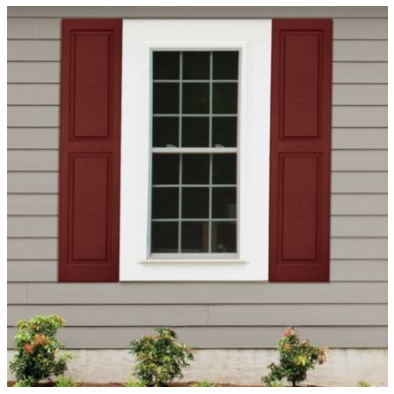

In [5]:
img = cv2.imread('./window.jpg') 

imshowBGR(img)

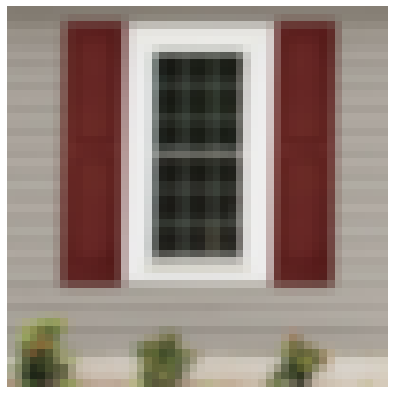

In [6]:
lowres = cv2.pyrDown(img)
lowres = cv2.pyrDown(lowres)
lowres = cv2.pyrDown(lowres) # you can also specify dstsize and borderType

imshowBGR(lowres)

In [7]:
print(img.shape)

# what do you expect the size of lowres to be?

(400, 400, 3)


In [8]:
lowres.shape

(50, 50, 3)

In [9]:
# does this work?
lowres2 = img[::8,::8,:] # take every other 8 pixel
print(lowres2.shape)

(50, 50, 3)


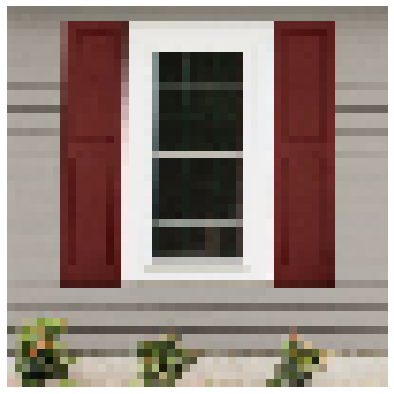

In [10]:
imshowBGR(lowres2)

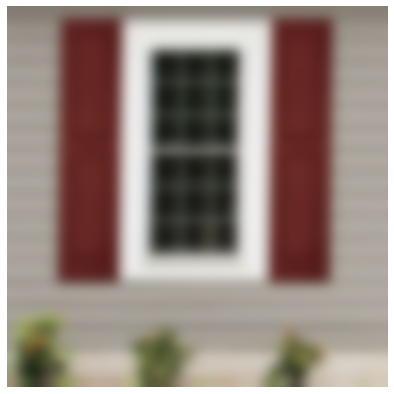

In [11]:
highres = cv2.pyrUp(lowres) # upsamples & then blurs
highres = cv2.pyrUp(highres)
highres = cv2.pyrUp(highres)

imshowBGR(highres)

In [12]:
print(lowres.shape)
print(highres.shape)

(50, 50, 3)
(400, 400, 3)


# Some other potentially useful stuff

1. counting cheerios, and learning about:
* Contrast Limited Adaptive Histogram Equalization, 
* Otsu's method, and
* Contours

(None, [], [])

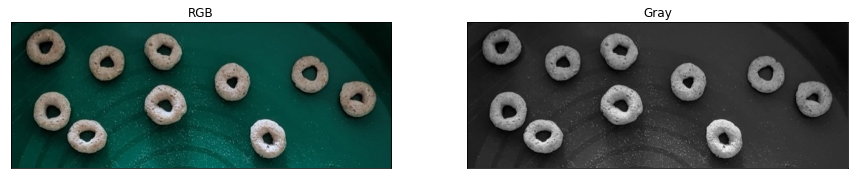

In [14]:
img = cv2.imread('./cheerios.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(cv2.cvtColor(img,cv2.cv2.COLOR_BGR2RGB))
ax1.title.set_text('RGB'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(gray,cmap = 'gray')
ax2.title.set_text('Gray'), ax2.set_xticks([]), ax2.set_yticks([])

how many cheerios?

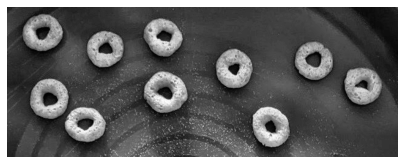

In [15]:
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
# https://docs.opencv.org/4.5.0/d5/daf/tutorial_py_histogram_equalization.html 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9,9))
cl1 = clahe.apply(gray)

imshowGray(cl1)

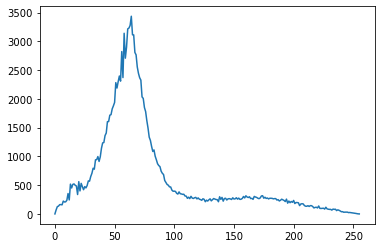

In [16]:
hist = cv2.calcHist([cl1],[0],None,[256],[0,256])
plt.plot(hist)

100.0


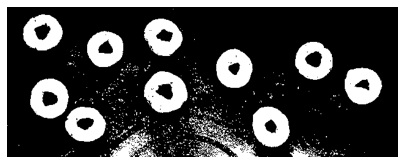

In [25]:
ret,th = cv2.threshold(cl1,100,255,cv2.THRESH_BINARY) # try different numbers. Can you find a threshold that gets all the edges, but nothing else?

# also try with gray instead of gray2 to notice the difference

print(ret)
imshowGray(th)

113.0


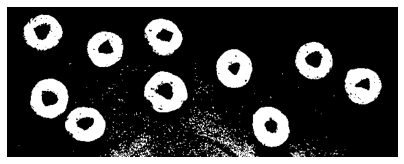

In [26]:
# another way: OTSU thresholding - automatically finds the threshold
# https://youtu.be/jUUkMaNuHP8?t=34
ret,th1 = cv2.threshold(cl1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 

print(ret)
imshowGray(th1)

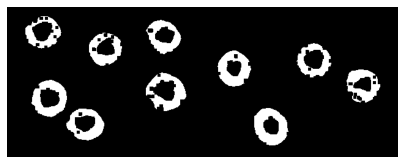

In [27]:
# morphologial erosion
kernel = np.ones((3,3),np.uint8)
th2 = cv2.erode(th1,kernel,iterations = 2) # iterations=1 if not using Otsu

imshowGray(th2)

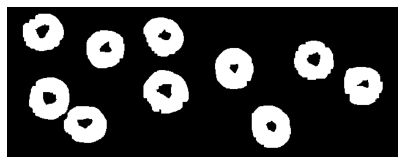

In [28]:
# morphologial dilation
kernel = np.ones((3,3),np.uint8)
th3 = cv2.dilate(th2,kernel,iterations = 4) # use iterations=5 if not using Otsu

imshowGray(th3)

In [31]:
# find contours
# https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

contours, hierarchy = cv2.findContours(th3, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) # RETR_CCOMP: find niternal and external contours

In [32]:
print(type(contours))
print(len(contours))
print(type(hierarchy))
print(hierarchy.shape)

<class 'list'>
20
<class 'numpy.ndarray'>
(1, 20, 4)


In [33]:
hierarchy # 4th "column":   == -1 : external
          #                 >=  0 : internal (equal numbers means inside the same external contour)

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 4,  0,  3, -1],
        [-1, -1, -1,  2],
        [ 6,  2,  5, -1],
        [-1, -1, -1,  4],
        [ 8,  4,  7, -1],
        [-1, -1, -1,  6],
        [10,  6,  9, -1],
        [-1, -1, -1,  8],
        [12,  8, 11, -1],
        [-1, -1, -1, 10],
        [14, 10, 13, -1],
        [-1, -1, -1, 12],
        [16, 12, 15, -1],
        [-1, -1, -1, 14],
        [18, 14, 17, -1],
        [-1, -1, -1, 16],
        [-1, 16, 19, -1],
        [-1, -1, -1, 18]]], dtype=int32)

In [35]:
hierarchy.shape # 1 x 20 x 4 tensor

(1, 20, 4)

In [36]:
print(hierarchy[0][:,-1]) # the last "column"

[-1  0 -1  2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18]


In [37]:
cheerio_count = np.count_nonzero(hierarchy[0][:,3]==-1)
print('number of cheerios in the image = ', cheerio_count)

number of cheerios in the image =  10


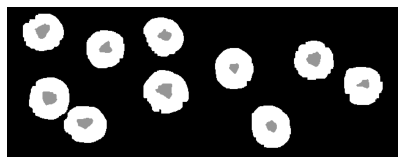

In [38]:
# Draw all countours

# Set up empty array the same size as the image
countour_img = np.zeros(th3.shape)  

for i in range(len(contours)):
  if hierarchy[0][i][3] == -1: # external countour
    cv2.drawContours(countour_img, contours, i, 255, -1)
  else: # internal contour
    cv2.drawContours(countour_img, contours, i, 150, -1)

imshowGray(countour_img)

# or try it this way:
# plt.figure(figsize=(7,7))
# plt.imshow(countour_img)
# plt.xticks([]), plt.yticks([])

2. Central Limit Theorem

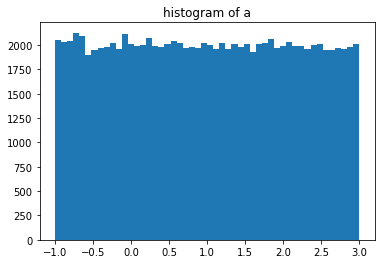

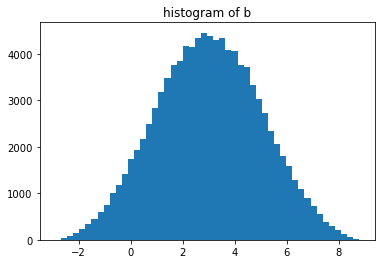

In [39]:
n = 3
A = np.random.uniform(low=-1, high=3, size=(100000,n)) # A[:,i] is 100,000 samples with uniform distribution
B = np.random.exponential(scale=1., size=(100000,n))   # B[:,j] is 100,000 samples with exponential distribution

X = A
# X = B
# X = A + B

a = X[:,:1]           
b = np.sum(X,axis=1)  


hist,bins = np.histogram(a, bins=50) 
plt.hist(a, bins) 
plt.title("histogram of a") 
plt.show()

hist,bins = np.histogram(b, bins=50) 
plt.hist(b, bins) 
plt.title("histogram of b") 
plt.show()



3. Viola-Jones (face) detector

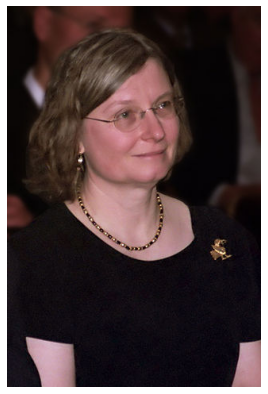

In [41]:
img = cv2.imread('./ID.jpg') 
# img = cv2.imread('/content/drive/My Drive/NT.jpg') 

imshowBGR(img)

In [43]:
#face_detector = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml') 
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

#eyes_detector = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_eye_tree_eyeglasses.xml')
eyes_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml') 

In [44]:
face_boxes = face_detector.detectMultiScale(img) # 'multi scale' reminds us of image pyramids
eyes_boxes = eyes_detector.detectMultiScale(img) 

In [45]:
face_boxes

array([[108,  84, 132, 132]], dtype=int32)

In [46]:
eyes_boxes

array([[186, 114,  23,  23],
       [131, 119,  39,  39]], dtype=int32)

(([], []), ([], []))

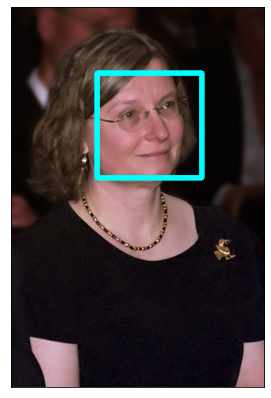

In [47]:
for (x,y,w,h) in face_boxes: 
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0), 5) 

plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img,cv2.cv2.COLOR_RGB2BGR))
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

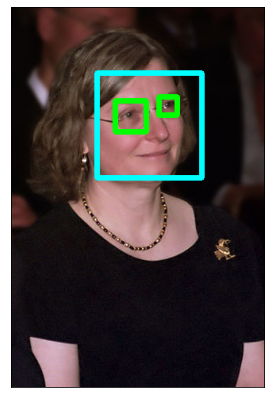

In [48]:
for (x,y,w,h) in eyes_boxes: 
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 5) 

plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(img,cv2.cv2.COLOR_RGB2BGR))
plt.xticks([]), plt.yticks([])

**practice:** write a program to show the live camera feed with blurred faces *italicized text*